In [4]:
import numpy as np
import sys
import pandas as pd

sys.path.insert(1, "/afs/cern.ch/user/d/dunetms/FBGana/ana_tools")
import getters
import matplotlib.pyplot as plt
plt.style.use("./presentation.mplstyle")

path_to_data = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
dates= ["20230221","20230222","20230223","20230224"]
plateaus = {
    "20230221":{"273_down":[10000,12300], "253_down":[22000,24300], "233_down":[34000,36300], "213_down":[45000,52000], "233_up":[61000,64000], "253_up":[73000,76000], "273_up":[85000,88000]},
    "20230222":{"273_down":[14000,19800], "253_down":[34000,39000], "233_down":[53000,58200], "213_down":[68000,77300]},
    "20230223":{"253_down":[12500,24000], "213_down":[34000,48000]},
    "20230224":{"293_down":[11900,15900], "283_down":[27750,31750], "273_down":[43650,47650], "263_down":[59550,63550], "253_down":[75450,79450], "243_down":[91350,95350],
    "233_down":[106450,110450], "223_down":[122350,126350], "213_down":[138250,142250], "223_up":[154150,158150], "233_up":[170050,174050], "243_up":[186000,190000],
    "253_up":[201900,205900], "263_up":[217800,221800], "273_up":[233700,237700]} }

# HUMEDAD

In [6]:
hum= getters.get_raw_data(path_to_data+dates[0]+"/", filetype="humidity", pol="Hum")     #pd.read_csv(path_to_split+dates[0]+"/"+"humidity.csv",header=0) 
temp= getters.get_raw_data(path_to_data+dates[0]+"/", filetype="temperature", pol="Temp")

t0=hum["Timestamp"][0]                        #Para poner a cero el tiempo
fig_h,axH = plt.subplots(figsize=(12,10))
axT=axH.twinx()                               #Para duplicar el eje.                

#Temperatura-CámaraC------
axT.plot(hum["Timestamp"]-t0,hum["T"]+273.15,color="red",alpha=0.5,label="Temp Climatic Chamber") 
axT.plot(temp["Timestamp"]-t0,temp["T1"],color="darkred",alpha=0.6,label="Temp RTD1")
fig_h.suptitle(dates[0])
axT.set_ylabel("Temperature (K)",color="darkred")
axT.tick_params(axis="y", labelcolor="darkred")

#Humedad-----------
axH.plot(hum["Timestamp"]-t0,hum["RH"],label="Humidity") 
axH.set_ylabel("Humidity (%)")
axH.set_xlabel("Time (s)")

#Legend: 
lines, labels = axH.get_legend_handles_labels()
lines2, labels2 = axT.get_legend_handles_labels()
axH.legend(lines + lines2, labels + labels2, loc=0)
axH.grid(False)

Keys to read: ['Hum1']



Reading humidity key: Hum: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Keys to read: ['Temp1']



Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


TypeError: tuple indices must be integers or slices, not str

# Temperatura (valores medios solo una wav)

In [4]:
results_mean=[[],[]]
results_std=[[],[]]


for date in dates:
    peaks=getters.get_raw_data(path_to_data+date+"/", filetype="peaks", pol="Av") 
    temp= getters.get_raw_data(path_to_data+date+"/", filetype="temperature", pol="Temp")
    for k in plateaus[date]:
        ti=plateaus[date][k][0]
        tf=plateaus[date][k][1]
        p_cut=peaks.loc[(peaks["Timestamp"]-np.min(peaks["Timestamp"])>ti)&(peaks["Timestamp"]-np.min(peaks["Timestamp"])<tf)].reset_index(drop=True)
        t_cut=temp.loc[(temp["Timestamp"]-np.min(temp["Timestamp"])>ti)&(temp["Timestamp"]-np.min(temp["Timestamp"])<tf)].reset_index(drop=True)
        wl_mean=np.mean(p_cut["Wav1-1"])
        t_mean=np.mean(t_cut["T1"])
        wl_std=np.std(p_cut["Wav1-1"])
        t_std=np.std(t_cut["T1"])
        results_mean[0].append(t_mean)
        results_mean[1].append(wl_mean)
        results_std[0].append(t_std)
        results_std[1].append(wl_std)


    

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [08:27<00:00, 22.06s/it]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [13:42<00:00, 35.74s/it]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:21<00:00,  1.53s/it]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 20.46it/s]


Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [04:52<00:00,  4.64s/it]


Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Down: 
 Valor medio T=233.522  y std=1.220e-02
Valor medio WL=112.162  y std=8.506e-13
Down: 
 Valor medio T=233.545  y std=1.069e-02
Valor medio WL=120.587  y std=1.749e-12


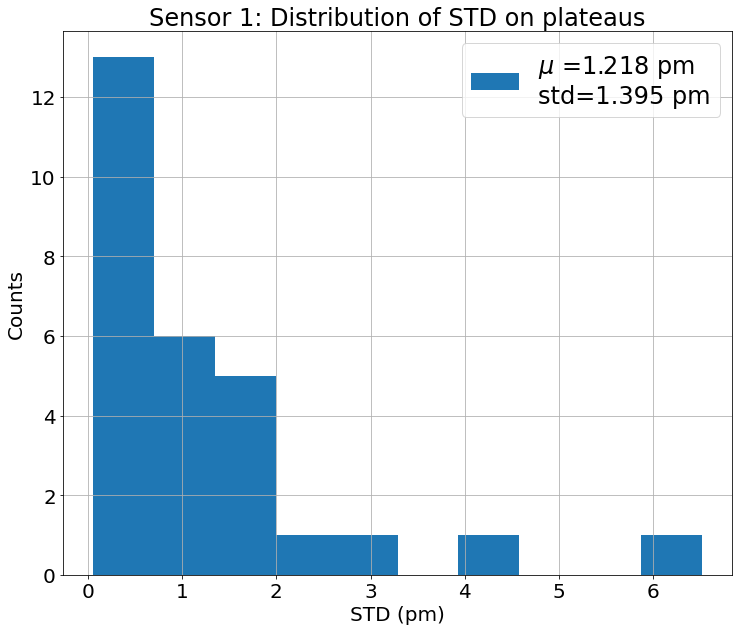

In [20]:

med_std=np.mean(results_std[1])
std_std=np.std(results_std[1])
fig_1,ax1 = plt.subplots(figsize=(12,10))
ax1.hist(np.array(results_std[1])*1e12,label="$\mu$ =%.3f pm\nstd=%.3f pm" %(med_std*1e12,std_std*1e12))
ax1.set_xlabel("STD (pm)")
ax1.set_ylabel("Counts")
ax1.set_title("Sensor 1: Distribution of STD on plateaus")
ax1.legend()

#Forma bruta:
#Los valores medios en el plateau 233 down el dia 1 (es el tercer valor por eso el indice 2)
print("Down: \n Valor medio T=%.3f  y std=%.3e" %(results_mean[0][2],results_std[0][2]))
print("Valor medio WL=%.3f  y std=%.3e" %(np.array(results_mean[1][2])*1e12-1534*1e3,results_std[1][2]))
      
#Los valores medios en el plateau 233 up el dia 1 (es el quinto valor por eso el indice 4)
print("Up: \n Valor medio T=%.3f  y std=%.3e" %(results_mean[0][4],results_std[0][4]))
print("Valor medio WL=%.3f  y std=%.3e" %(np.array(results_mean[1][4])*1e12-1534*1e3,results_std[1][4]))

Text(0.5, 1.0, 'Wavelength vs Temperature for the sensor 1')

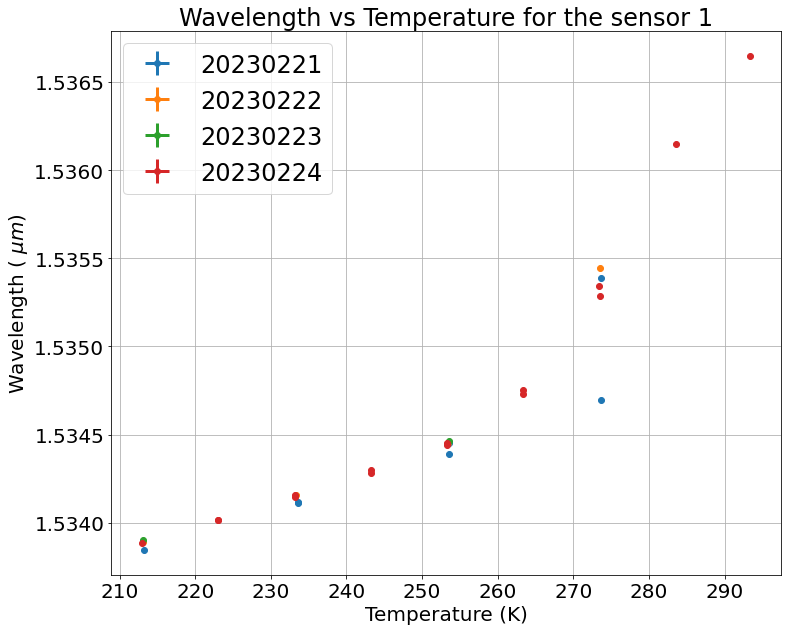

In [15]:
fig_2,ax2 = plt.subplots(figsize=(12,10))
dates= ["20230221","20230222","20230223","20230224"]

l=[7,11,13,28]
count, k= 0, 0

for i in l:
    ax2.errorbar(results_mean[0][k:i],np.array(results_mean[1][k:i])*1e6,yerr=np.array(results_std[1][k:i])*1e6,xerr=results_std[0][k:i], fmt="o",label=dates[count])
    k=i
    count+=1
    
ax2.legend()
ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel("Wavelength ( $\mu m$)")
ax2.set_title("Wavelength vs Temperature for the sensor 1")



In [7]:
def cut_plat(data,plateaus,date):
    dplat={}
    for plateau in plateaus[date]:
        ti=plateaus[date][plateau][0]
        tf=plateaus[date][plateau][1]
        dplat[plateau]=data.loc[(data["Timestamp"]-np.min(data["Timestamp"])>ti)&(data["Timestamp"]-np.min(data["Timestamp"])<tf)].reset_index(drop=True)
    return dplat

#peaks=getters.get_raw_data(path_to_data+"20230222"+"/", filetype="peaks", pol="Av") 

temp, d=getters.get_raw_data(path_to_data+"20230221"+"/", filetype="temperature", pol="Temp")

t_cut= cut_plat(temp,plateaus,d)

print(t_cut)



Keys to read: ['Temp1']



Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 15.07it/s]

{'273_down':             Date      Time         T1         T2     Timestamp
0     21/02/2023  12:17:28  273.67197  273.54482  1.676978e+09
1     21/02/2023  12:17:28  273.66720  273.53468  1.676978e+09
2     21/02/2023  12:17:29  273.66891  273.54625  1.676978e+09
3     21/02/2023  12:17:30  273.66785  273.54265  1.676978e+09
4     21/02/2023  12:17:30  273.66789  273.53431  1.676978e+09
...          ...       ...        ...        ...           ...
3770  21/02/2023  12:55:44  273.65862  273.54691  1.676981e+09
3771  21/02/2023  12:55:45  273.65910  273.54471  1.676981e+09
3772  21/02/2023  12:55:45  273.65833  273.54298  1.676981e+09
3773  21/02/2023  12:55:46  273.65925  273.54148  1.676981e+09
3774  21/02/2023  12:55:46  273.65887  273.54193  1.676981e+09

[3775 rows x 5 columns], '253_down':             Date      Time         T1         T2     Timestamp
0     21/02/2023  15:37:28  253.62365  253.48503  1.676990e+09
1     21/02/2023  15:37:28  253.62365  253.49191  1.676990e+09
2   

In [33]:
nombre="esto/lootro/"+"20230221"+"/"
nombre.split("/")[-2]

'20230221'